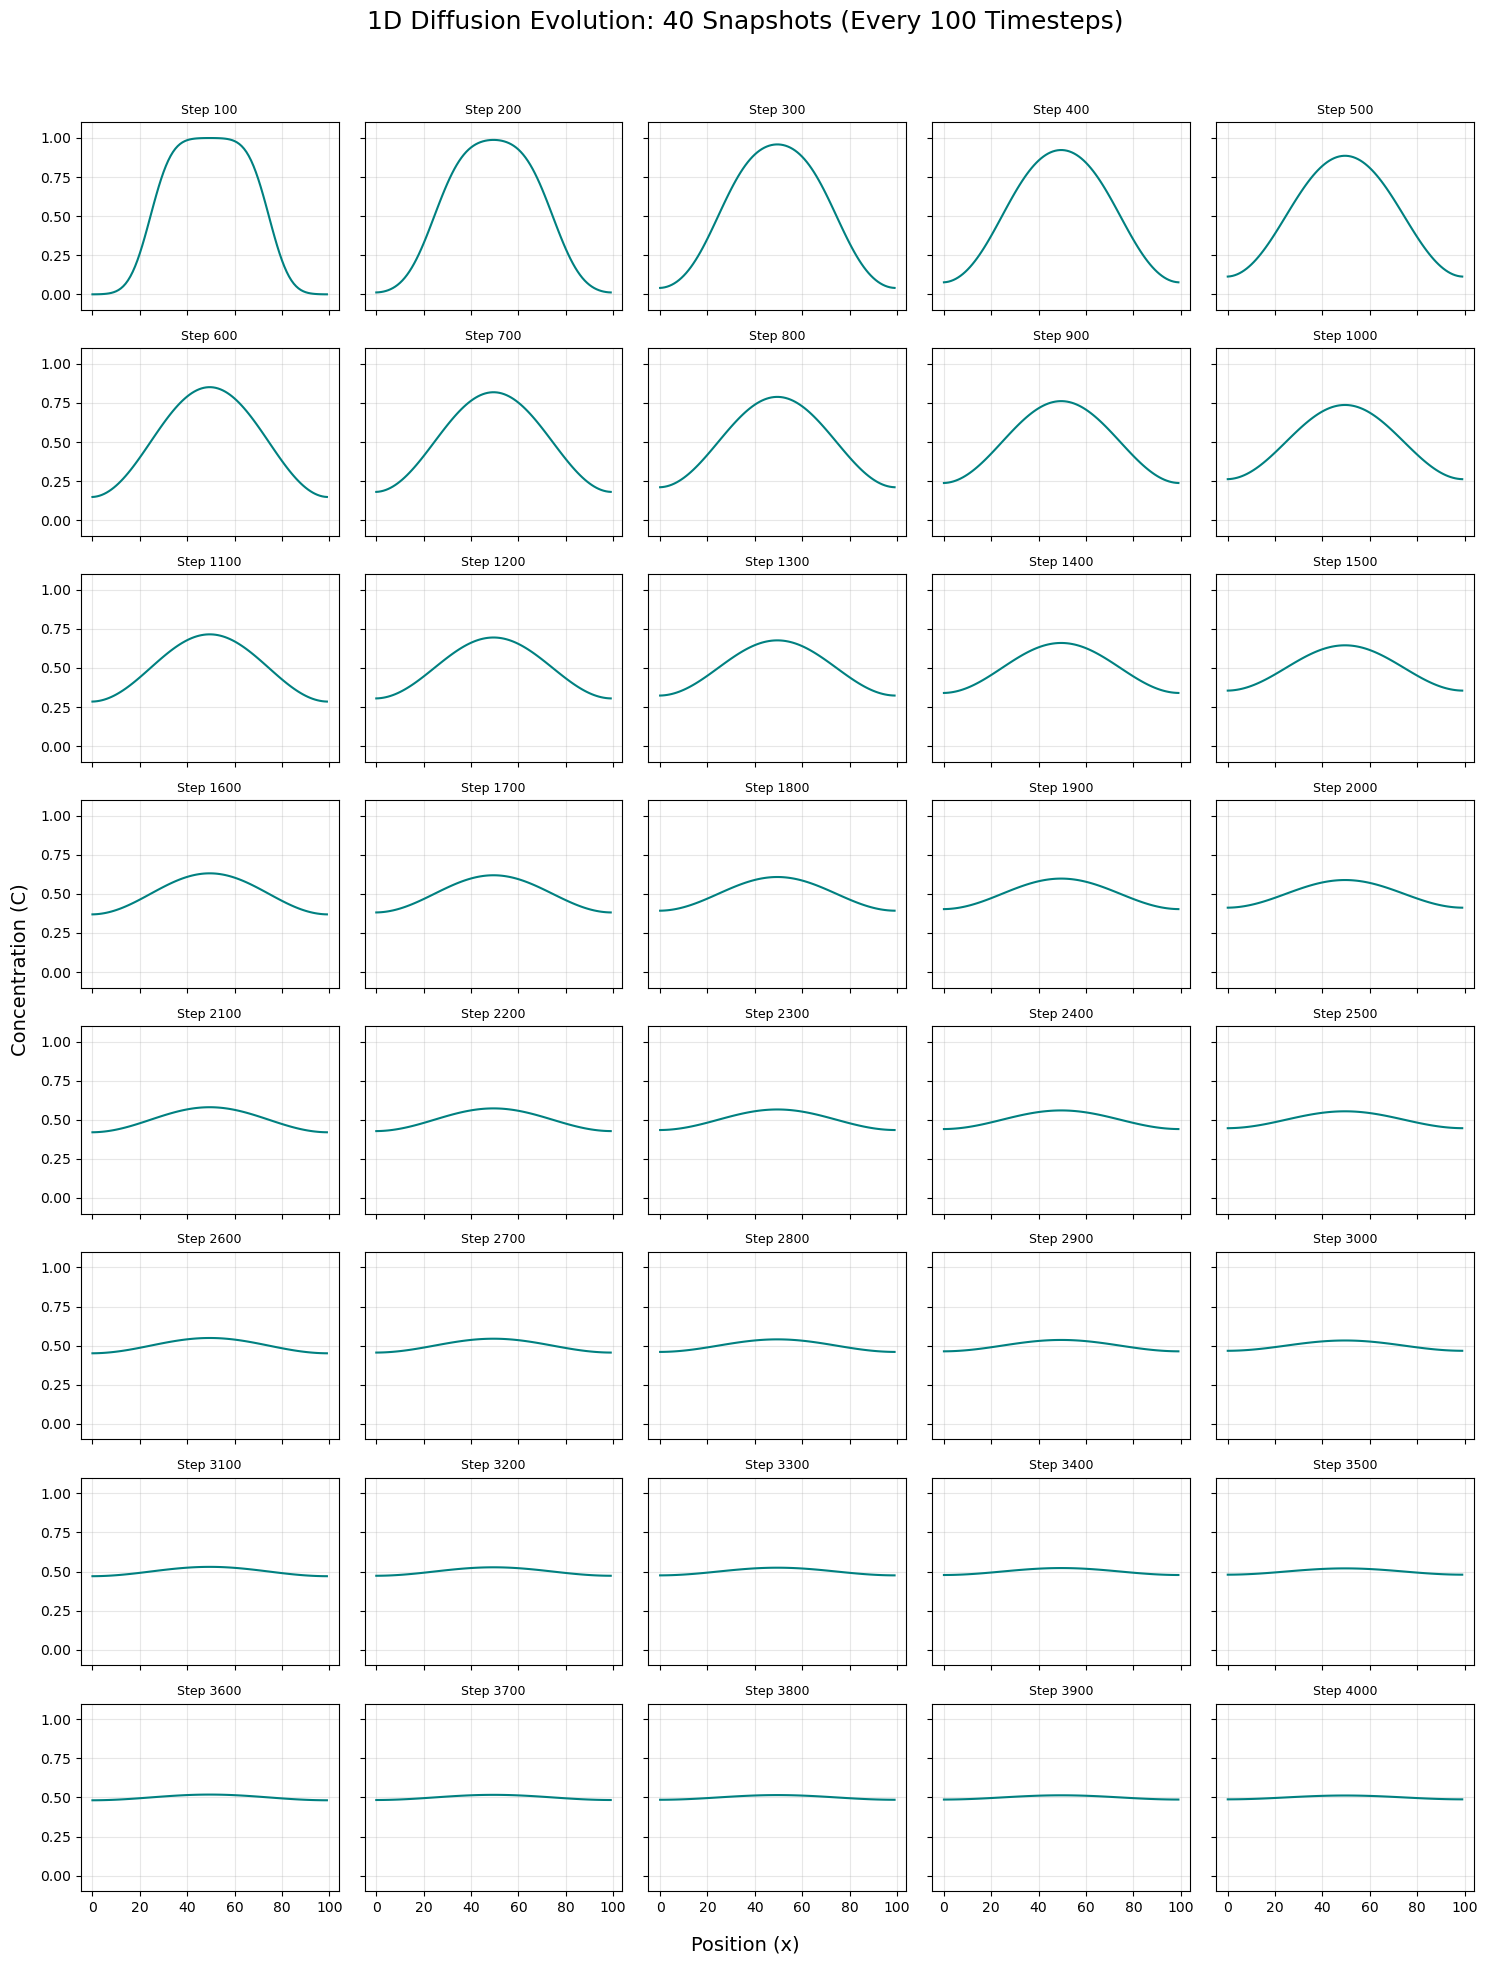

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_and_plot_diffusion():
    nx = 100            # Spatial points
    total_timesteps = 4000
    D = 1.0             # Diffusion coefficient
    dx = 1.0            # Spatial step
    dt = 0.25           # Time step
    r = (D * dt) / (dx**2) 
    
    plot_interval = 100 
    
    # Initial Condition
    c = np.zeros(nx)
    c[nx//4 : 3*nx//4] = 1.0
    x = np.arange(nx) * dx
    snapshots = []
    times = []

    # Simulation Loop
    curr_c = c.copy()
    
    for t in range(1, total_timesteps + 1):
        # Using np.roll for periodic boundary conditions
        c_left = np.roll(curr_c, 1)
        c_right = np.roll(curr_c, -1)
        
        # Finite Difference Update
        curr_c = curr_c + r * (c_left - 2.0 * curr_c + c_right)
        
        # Capture snapshot every 100 steps
        if t % plot_interval == 0:
            snapshots.append(curr_c.copy())
            times.append(t)

    # Plotting (8x5 Grid for 40 plots)
    fig, axes = plt.subplots(8, 5, figsize=(15, 20), sharex=True, sharey=True)
    axes_flat = axes.flatten()

    for i in range(len(snapshots)):
        axes_flat[i].plot(x, snapshots[i], color='teal', linewidth=1.5)
        axes_flat[i].set_title(f'Step {times[i]}', fontsize=9)
        axes_flat[i].grid(True, alpha=0.3)
        
        # Limiting y-axis 
        axes_flat[i].set_ylim(-0.1, 1.1)

    # Global labels and layout
    fig.text(0.5, 0.01, 'Position (x)', ha='center', fontsize=14)
    fig.text(0.01, 0.5, 'Concentration (C)', va='center', rotation='vertical', fontsize=14)
    plt.suptitle('1D Diffusion Evolution: 40 Snapshots (Every 100 Timesteps)', fontsize=18)
    
    plt.tight_layout(rect=[0.02, 0.02, 1, 0.96])
    plt.show()

# Run the simulation
simulate_and_plot_diffusion()